## Classification Simpsons

In [3]:
import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd

### 1. UPLOADING THE DATABASE


In [4]:
# The directory where we will store our smaller dataset/
base_dir = "data_split"

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


Homer = 'homer_simpson'
Bart = 'bart_simpson'
Burns = 'charles_montgomery_burns'
Krusty = 'krusty_the_clown'
Lisa = 'lisa_simpson'
Milhouse = 'milhouse_van_houten'
Marge = 'marge_simpson'
Moe = 'moe_szyslak'
Ned = 'ned_flanders'
Principal = 'principal_skinner'


# Directory with our training images
train_homer = os.path.join(train_dir, Homer)
train_bart = os.path.join(train_dir, Bart)
train_burns = os.path.join(train_dir, Burns)
train_krusty = os.path.join(train_dir, Krusty)
train_lisa = os.path.join(train_dir, Lisa)
train_milhouse = os.path.join(train_dir, Milhouse)
train_marge = os.path.join(train_dir, Marge)
train_more = os.path.join(train_dir, Moe)
train_ned = os.path.join(train_dir, Ned)
train_principal = os.path.join(train_dir, Principal)

# Directory with our valiation images
val_homer = os.path.join(validation_dir, Homer)
val_bart = os.path.join(validation_dir, Bart)
val_burns = os.path.join(validation_dir, Burns)
val_krusty = os.path.join(validation_dir, Krusty)
val_lisa = os.path.join(validation_dir, Lisa)
val_milhouse = os.path.join(validation_dir, Milhouse)
val_marge = os.path.join(validation_dir, Marge)
val_more = os.path.join(validation_dir, Moe)
val_ned = os.path.join(validation_dir, Ned)
val_principal = os.path.join(validation_dir, Principal)

# Directory with our test images
test_homer = os.path.join(test_dir, Homer)
test_bart = os.path.join(test_dir, Bart)
test_burns = os.path.join(test_dir, Burns)
test_krusty = os.path.join(test_dir, Krusty)
test_lisa = os.path.join(test_dir, Lisa)
test_milhouse = os.path.join(test_dir, Milhouse)
test_marge = os.path.join(test_dir, Marge)
test_more = os.path.join(test_dir, Moe)
test_ned = os.path.join(test_dir, Ned)
test_principal = os.path.join(test_dir, Principal)


Let's control how many pictures we have in each training split (train/validation/test):

In [3]:
print('total training Homer images:', len(os.listdir(train_homer)))
print('total validation Homer images:', len(os.listdir(val_homer)))
print('total test Homer images:', len(os.listdir(test_homer)))


total training Homer images: 1572
total validation Homer images: 337
total test Homer images: 337


### 2. BUILDING THE NETWORK


In [4]:
# from tensorflow.keras import layers
# from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

2021-09-30 10:27:10.973826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-30 10:27:10.982032: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-09-30 10:27:10.982054: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-09-30 10:27:10.982591: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

**COMPILING THE MODEL**


In [6]:
#from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


### 3. DATA PREPROCESSING

In [7]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale all images by 1./255
train_datagen = ImageDataGenerator()
validation_datagen = ImageDataGenerator()

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir, # target directory
        class_mode='categorical') 

Found 9663 images belonging to 10 classes.


In [9]:
validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # validation directory
        class_mode='categorical')

Found 2072 images belonging to 10 classes.


In [10]:
#Check which images cause problems 
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

cnt= 0

path = Path(train_homer).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)
            cnt+=1
            
# print(cnt)

In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 256, 256, 3)
labels batch shape: (32, 10)


****************************************************
### CALLBACKS

In [12]:
earlystop = EarlyStopping(
    monitor='val_acc',
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode='auto')

In [13]:
csv_logger = CSVLogger('training.log', 
                       separator=',', 
                       append=False)

### 4. FITTING THE MODEL WITH A BATCH GENERATOR

In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[earlystop, csv_logger]
)


2021-09-30 10:27:12.024933: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
100/100 [==============================] - 144s 1s/step - loss: 7.9685 - acc: 0.2872 - val_loss: 1.7308 - val_acc: 0.4462
Epoch 2/30
100/100 [==============================] - 124s 1s/step - loss: 1.4808 - acc: 0.5236 - val_loss: 1.5658 - val_acc: 0.5194
Epoch 3/30
100/100 [==============================] - 124s 1s/step - loss: 1.1551 - acc: 0.6353 - val_loss: 1.4422 - val_acc: 0.5794
Epoch 4/30
100/100 [==============================] - 124s 1s/step - loss: 0.9349 - acc: 0.7109 - val_loss: 1.5741 - val_acc: 0.5412
Epoch 5/30
100/100 [==============================] - 124s 1s/step - loss: 0.7233 - acc: 0.7837 - val_loss: 1.2551 - val_acc: 0.6169
Epoch 6/30
100/100 [==============================] - 124s 1s/step - loss: 0.5605 - acc: 0.8350 - val_loss: 1.1779 - val_acc: 0.6650
Epoch 7/30
100/100 [==============================] - 125s 1s/step - loss: 0.4506 - acc: 0.8634 - val_loss: 1.2760 - val_acc: 0.6881
Epoch 8/30
100/100 [==============================] - 124s 1s/step - 


#### SAVE THE MODEL


In [15]:
model.save('simpsons.h5')


#### PLOT ACCURACY AND LOSS OF THE MODEL

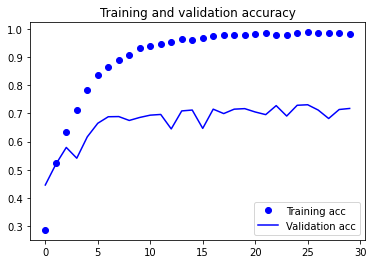

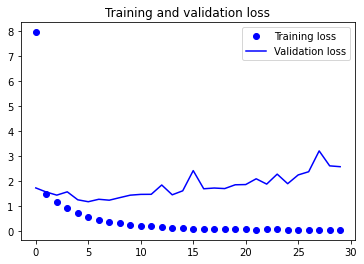

In [16]:
#IF YOU ARE PATIENT ENOUGH TO WAIT FOR THE MODEL TO TRAIN


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
#IF YOU UPLOAD EXISTING MODEL
import pandas as pd
log_data = pd.read_csv('logs/training.log', sep=',', engine='python')

log_data.head()

,epoch,acc,loss,val_acc,val_loss
0,0,0.287187,7.968453,0.446250,1.730840
1,1,0.523601,1.480786,0.519375,1.565832
2,2,0.635312,1.155068,0.579375,1.442194
3,3,0.710938,0.934891,0.541250,1.574094
4,4,0.783750,0.723274,0.616875,1.255078


In [20]:
acc = log_data['acc']
val_acc = log_data['val_acc']
loss = log_data['loss']
val_loss = log_data['val_loss']

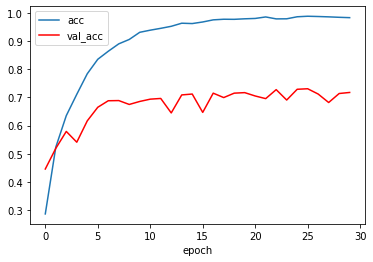

In [21]:
# very poor but fast way to plot stuff...
ax = plt.gca()

log_data.plot(kind='line',x='epoch',y='acc',ax=ax)
log_data.plot(kind='line',x='epoch',y='val_acc', color='red', ax=ax)

plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

2021-09-30 14:55:20.579208: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-09-30 14:55:20.579282: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: J-glo-Dell-G15-5510
2021-09-30 14:55:20.579300: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: J-glo-Dell-G15-5510
2021-09-30 14:55:20.579464: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.57.2
2021-09-30 14:55:20.579522: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.57.2
2021-09-30 14:55:20.579536: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.57.2
2021-09-30 14:55:20.580014: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in p

In [6]:

#NO EARLYSTOPPING CALLBACK
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


csv_logger = CSVLogger('training_augmented.log',
                       separator=',',
                       append=False)


history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[csv_logger])


FileNotFoundError: [Errno 2] No such file or directory: '.gitignore/data_split/train'